# Benchmark de Funções de Otimização

### Importações

In [19]:
import pandas as pd
import numpy as np
import time
from scipy.optimize import minimize, basinhopping, dual_annealing, differential_evolution
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Função de Rosembrock

In [20]:
def rosenbrock(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

### Plota Função

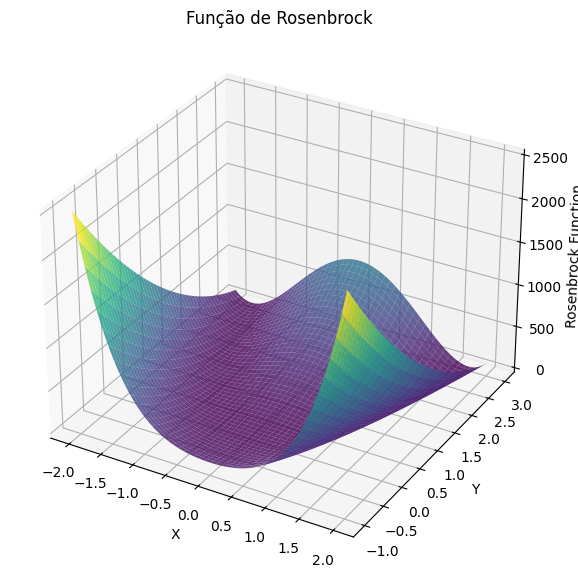

In [21]:
# Cria Grade
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Converte Grade
Z = np.array([rosenbrock([X[i, j], Y[i, j]]) for i in range(X.shape[0]) for j in range(X.shape[1])])
Z = Z.reshape(X.shape)

# Criando o gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotando a superfície
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Rosenbrock Function")
ax.set_title("Função de Rosenbrock")

plt.show()

### Parâmetros

In [22]:
# Limites
bounds = [(-2, 2), (-2, 2)]
# X e Y iniciais
x0 = np.array([0, 0])

# métodos
methods = {
    "Nelder-Mead": lambda: minimize(rosenbrock, x0, method='Nelder-Mead'),
    "BFGS": lambda: minimize(rosenbrock, x0, method='BFGS'),
    "L-BFGS-B": lambda: minimize(rosenbrock, x0, method='L-BFGS-B', bounds=bounds),
    "Basinhopping": lambda: basinhopping(rosenbrock, x0, niter=100),
    "Simulated Annealing (dual_annealing)": lambda: dual_annealing(rosenbrock, bounds),
    "Differential Evolution": lambda: differential_evolution(rosenbrock, bounds)
}

### Excecução

In [23]:
# Executa cada método e mede o tempo
results = {}
for method, func in methods.items():
    start_time = time.time()
    result = func()
    elapsed_time = time.time() - start_time
    results[method] = {
        "Optimal Value": result.fun,
        "Optimal Point": result.x,
        "Time (s)": elapsed_time
    }

### Resultados

In [24]:
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,Optimal Value,Optimal Point,Time (s)
Nelder-Mead,3.686177e-10,"[1.0000043858986165, 1.0000106409916478]",0.003052
BFGS,2.843992e-11,"[0.9999946714964494, 0.9999893213499021]",0.008619
L-BFGS-B,7.420081e-12,"[0.9999972819330257, 0.9999945459310088]",0.013769
Basinhopping,7.078721e-12,"[0.9999973396855268, 0.9999946755733545]",0.522561
Simulated Annealing (dual_annealing),9.024746e-12,"[0.999996996171869, 0.9999939881542098]",0.199824
Differential Evolution,0.000000e+00,"[1.0, 1.0]",0.171719
